In [19]:
import glob
import os

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

import hermione as hm

metadata_folder = os.path.join('..', 'metadata' )

annotation_folder = os.path.join(metadata_folder, 'manual_annotations')
# annotation_folder

summary_folder = os.path.join(metadata_folder, 'summary')
! mkdir $summary_folder


mkdir: ../metadata/summary: File exists


In [20]:


# Editable text and proper LaTeX fonts in illustrator
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True

# Editable fonts. 42 is the magic number
matplotlib.rcParams['pdf.fonttype'] = 42

# Use "Computer Modern" (LaTeX font) for math numbers
matplotlib.rcParams['mathtext.fontset'] = 'cm'
%matplotlib inline

sns.set(style='whitegrid', context='paper')

In [21]:
! conda list -n maca

# packages in environment at /Users/olgabot/anaconda3/envs/maca:
#
appnope                   0.1.0                    py36_0  
beautifulsoup4            4.6.0                     <pip>
bkcharts                  0.2                      py36_0  
bokeh                     0.12.6                   py36_0  
certifi                   2017.4.17                 <pip>
chardet                   3.0.4                     <pip>
click                     6.7                       <pip>
curl                      7.49.0                        1  
cycler                    0.10.0                   py36_0  
dash                      0.17.7                    <pip>
dash-core-components      0.5.1                     <pip>
dash-html-components      0.6.2                     <pip>
dash-renderer             0.7.3                     <pip>
dash.ly                   0.17.3                    <pip>
decorator                 4.0.11                   py36_0  
fastcluster               1.1.23              np113

In [33]:
print(matplotlib.get_backend())

module://ipykernel.pylab.backend_inline


In [22]:
csv = os.path.join(metadata_folder, 'maca_3month_annotations_plates.csv')

cell_annotations = pd.read_csv(csv, index_col=0)
print(cell_annotations.shape)
cell_annotations.head()

(42192, 5)


,annotation,plate.barcode,subannotation,tissue,annotation_subannotation
A21.MAA000594.3_8_M.1.1,fibroblasts,MAA000594,NaN,Aorta,fibroblasts
F8.MAA000594.3_8_M.1.1,unknown,MAA000594,NaN,Aorta,unknown
H11.MAA000594.3_8_M.1.1,unknown,MAA000594,NaN,Aorta,unknown
A22.MAA000594.3_8_M.1.1,unknown,MAA000594,NaN,Aorta,unknown
H12.MAA000594.3_8_M.1.1,adipocytes,MAA000594,NaN,Aorta,adipocytes


In [23]:
folder = os.path.join(metadata_folder, 'number_of_cells_reads_genes/')

In [24]:
ls $folder

Aorta_cell_numbers.csv                  Liver_nreads_ngenes.csv
Aorta_nreads_ngenes.csv                 Lung_cell_numbers.csv
Bladder_cell_numbers.csv                Lung_nreads_ngenes.csv
Bladder_nreads_ngenes.csv               Mammary_Gland_cell_numbers.csv
Brain_FACS_microglia_cell_numbers.csv   Mammary_Gland_nreads_ngenes.csv
Brain_FACS_microglia_nreads_ngenes.csv  Mammary_cell_numbers.csv
Brain_FACS_neurons_cell_numbers.csv     Mammary_nreads_ngenes.csv
Brain_FACS_neurons_nreads_ngenes.csv    Marrow_cell_numbers.csv
Brain_Microglia_cell_numbers.csv        Marrow_nreads_ngenes.csv
Brain_Microglia_nreads_ngenes.csv       Muscle_cell_numbers.csv
Brain_Neurons_cell_numbers.csv          Muscle_nreads_ngenes.csv
Brain_Neurons_nreads_ngenes.csv         Pancreas_cell_numbers.csv
Colon_cell_numbers.csv                  Pancreas_nreads_ngenes.csv
Colon_nreads_ngenes.csv                 Skin_cell_numbers.csv
Diaphragm_cell_numbers.csv              Skin_nreads_ngenes.csv
Diaphragm_nreads_ngen

In [25]:


globber = f'{folder}/*_nreads_ngenes.csv'

dfs = []

for filename in glob.iglob(globber):
    df = pd.read_csv(filename, index_col=0)
    df['tissue'] = os.path.basename(filename).split('_nreads_ngenes.csv')[0]
    dfs.append(df)
nreads_ngenes = pd.concat(dfs)

print(nreads_ngenes.shape)
print(len(nreads_ngenes.groupby('tissue')))
nreads_ngenes.head()

(53095, 4)
23


,nGene,nReads,orig.ident,tissue
A21.MAA000594.3_8_M.1.1,3850,1848089,Heart,Aorta
F8.MAA000594.3_8_M.1.1,788,55689,Heart,Aorta
H11.MAA000594.3_8_M.1.1,554,318135,Heart,Aorta
A22.MAA000594.3_8_M.1.1,1279,270173,Heart,Aorta
H12.MAA000594.3_8_M.1.1,946,278892,Heart,Aorta


In [26]:
nreads_ngenes['log10 nReads'] = np.log10(nreads_ngenes['nReads'])

In [27]:
colors = pd.read_csv(os.path.join(metadata_folder, 'tissue_colors.csv'), index_col=0, squeeze=True)
colors

Aorta              #1f77b4
Bladder            #aec7e8
Brain_Microglia    #ff7f0e
Brain_Neurons      #ffbb78
Colon              #2ca02c
Diaphragm          #98df8a
Fat                #d62728
Heart              #ff9896
Kidney             #9467bd
Liver              #c5b0d5
Lung               #8c564b
Mammary            #c49c94
Marrow             #e377c2
Muscle             #f7b6d2
Pancreas           #7f7f7f
Skin               #c7c7c7
Spleen             #bcbd22
Thymus             #dbdb8d
Tongue             #17becf
Trachea            #9edae5
Name: color, dtype: object

In [28]:
# Replace underscores with spaces for LaTeX happiness
nreads_ngenes['tissue'] = nreads_ngenes['tissue'].str.replace('_', ' ')
colors.index = colors.index.str.replace('_', ' ')
cell_annotations['tissue'] = cell_annotations['tissue'].str.replace('_', ' ')

In [29]:
tissues = sorted(cell_annotations['tissue'].unique())
tissues

['Aorta',
 'Bladder',
 'Brain Microglia',
 'Brain Neurons',
 'Colon',
 'Diaphragm',
 'Fat',
 'Heart',
 'Kidney',
 'Liver',
 'Lung',
 'Mammary',
 'Marrow',
 'Muscle',
 'Pancreas',
 'Skin',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea']

In [30]:
kwargs = dict(data=nreads_ngenes, row='tissue', facet_kws=dict(sharex=True),
               row_order=tissues, palette=colors, xlabel_suffix='')

/Users/olgabot/anaconda3/envs/maca/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Helvetica
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/olgabot/anaconda3/envs/maca/lib/python3.6/site-packages/matplotlib/font_manager.py:1326: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=normal:weight=normal:stretch=normal:size=9.600000000000001. Returning /Users/olgabot/anaconda3/envs/tensorflow-env/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/afm/cmex10.afm
  UserWarning)


KeyError: 'question'

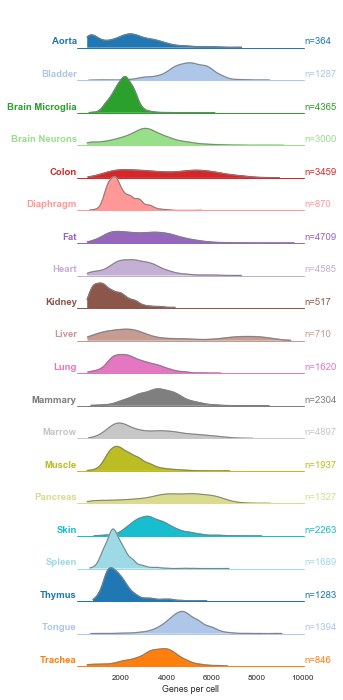

In [32]:
g = hm.horizonplot(x='nGene', **kwargs)
g.set_xlabels('Genes per cell')
for ax in g.axes.flatten():
#     ax.grid(axis='x', zorder=100, color='white', clip_on=False)

    if not ax.is_last_row():
        plt.setp(ax.get_xticklabels(), visible=False)
        x = ax.get_xticks()
    else:
        pass
#         ax.vlines(x, 0, 100, clip_on=False, color='white', zorder=100)
        
g.savefig('horizonplot_genes_per_cell.pdf')